<a href="https://colab.research.google.com/github/molnason/DP/blob/main/Molnarova_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Making under the Influence of Forgetting and Discounting**

## Problem Description

Decision processes can be described as an evolution of a modelled system from its current state to a new state based on a chosen action. Given system model $m$ and its behavior (mismodelling and time variance), the goal is to choose conditional densities $r$ with high probability on actions which optimize the decision process at hand.

evol.svg

Densities $m$ and $r$ can be influenced by the means of different parameters. The focus of this report will be on two specific ones, namely discounting and forgetting factor. The report aims to show what is the effect (if any) of the two on system performance.

## Simulation Setup

The set of all possible actions was taken as $\{1,2\}$ whereas the set of all possible states was said to be $\{1,2,3\}$. Out of these two sets, values $2$ and $3$ was selected as the optimizing action and preferred state.
Discounting factor $\varphi$ and forgetting factor $\lambda$ values were scaled logarithmically as
<center>
$\varphi = \lambda = (0.9999, 0.9997, 0.9992, 0.9978, 0.994, 0.9833, 0.9536, 0.8708, 0.6406)$.
</center>

Each factor combination characterized one simulation (decision process) composed of $200$ decision epochs. To eliminate seed dependencies, each simulation ran with $50$ different seed values. Results in the form of state and action occurances are then normalized to one through all epochs and seeds and shown in tables and heatmaps in the following section.



In [1]:
#@title Load Data

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, Markdown
from google.colab import data_table


# Load data
url_amis = 'https://raw.githubusercontent.com/molnason/DP/main/a_mismodelling.txt'
url_anotv = 'https://raw.githubusercontent.com/molnason/DP/main/a_mismodelling_no_time_variance.txt'
url_anomis = 'https://raw.githubusercontent.com/molnason/DP/main/a_no_mismodelling.txt'

url_smis = 'https://raw.githubusercontent.com/molnason/DP/main/s_mismodelling.txt'
url_snotv = 'https://raw.githubusercontent.com/molnason/DP/main/s_mismodelling_no_time_variance.txt'
url_snomis = 'https://raw.githubusercontent.com/molnason/DP/main/s_no_mismodelling.txt'


# Read data
a_mis   = pd.read_csv(url_amis, sep='\t', header=None)
a_notv  = pd.read_csv(url_anotv, sep='\t', header=None)
a_nomis = pd.read_csv(url_anomis, sep='\t', header=None)

s_mis   = pd.read_csv(url_smis, sep='\t', header=None)
s_notv  = pd.read_csv(url_snotv, sep='\t', header=None)
s_nomis = pd.read_csv(url_snomis, sep='\t', header=None)


# Format tables
data_table.enable_dataframe_formatter()

col_names = [0.9999, 0.9997, 0.9992, 0.9978, 0.9940, 0.9833, 0.9536, 0.8708, 0.6406]

a_mis.columns = [i for i in col_names]
a_notv.columns = [i for i in col_names]
a_nomis.columns = [i for i in col_names]

s_mis.columns = [i for i in col_names]
s_notv.columns = [i for i in col_names]
s_nomis.columns = [i for i in col_names]


# Markdowns
m_mis_s1 = """
<center>

### Mismodelling Case with State 1

</center>
"""

m_mis_s2 = """
<center>

### Mismodelling Case with State 2

</center>
"""

m_mis_s3 = """
<center>

### Mismodelling Case with State 3

</center>
"""

m_mis_a1 = """
<center>

### Mismodelling Case with Action 1

</center>
"""

m_mis_a2 = """
<center>

### Mismodelling Case with Action 2

</center>
"""

m_notv_s1 = """
<center>

### Invariant Case with State 1

</center>
"""

m_notv_s2 = """
<center>

### Invariant Case with State 2

</center>
"""

m_notv_s3 = """
<center>

### Invariant Case with State 3

</center>
"""

m_notv_a1 = """
<center>

### Invariant Case with Action 1

</center>
"""

m_notv_a2 = """
<center>

### Invariant Case with Action 2

</center>
"""

m_nomis_s1 = """
<center>

### Correct Modelling Case with State 1

</center>
"""

m_nomis_s2 = """
<center>

### Correct Modelling Case with State 2

</center>
"""

m_nomis_s3 = """
<center>

### Correct Modelling Case with State 3

</center>
"""

m_nomis_a1 = """
<center>

### Correct Modelling Case with Action 1

</center>
"""

m_nomis_a2 = """
<center>

### Correct Modelling Case with Action 2

</center>
"""

## Results

System model $m$ is generally not known and its estimation is always only approximate. The deviance of the model and its estimate is called mismodelling error.

Mismodelling error can be either constant in time or it can change in each decision epoch. The first subsection works with a model whose mismodelling error starts off as zero and gradually increases in time whereas in the second subsection the model is considered to be fully corrupted from the beginning of the process. Uncorrupted system model is shown in the third section as a comparison.

### Mismodelled system

In [2]:
# state segmentation
s1 = s_mis.iloc[:9,:]
s2 = s_mis.iloc[9:18,:]
s3 = s_mis.iloc[18:,:]

# action segmentation
a1 = a_mis.iloc[:9,:]
a2 = a_mis.iloc[9:,:]

# labels
s1.index = col_names
s2.index = col_names
s3.index = col_names

a1.index = col_names
a2.index = col_names

In [3]:
# table
display(Markdown(m_mis_s1))
data_table.DataTable(s1, include_index=True)


<center>

### Mismodelling Case with State 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1520,0.1521,0.1521,0.1523,0.1525,0.1535,0.1548,0.1586,0.1658
0.9997,0.1520,0.1521,0.1521,0.1523,0.1525,0.1535,0.1548,0.1586,0.1657
0.9992,0.1520,0.1521,0.1521,0.1523,0.1525,0.1537,0.1548,0.1586,0.1660
0.9978,0.1520,0.1521,0.1521,0.1523,0.1525,0.1537,0.1548,0.1587,0.1662
0.9940,0.1522,0.1523,0.1523,0.1524,0.1526,0.1537,0.1550,0.1587,0.1666
0.9833,0.1530,0.1531,0.1530,0.1529,0.1529,0.1542,0.1558,0.1593,0.1680
0.9536,0.1541,0.1541,0.1542,0.1543,0.1541,0.1553,0.1566,0.1607,0.1701
0.8708,0.1580,0.1580,0.1580,0.1576,0.1580,0.1584,0.1602,0.1648,0.1757
0.6406,0.1769,0.1771,0.1765,0.1765,0.1750,0.1700,0.1700,0.1761,0.1911


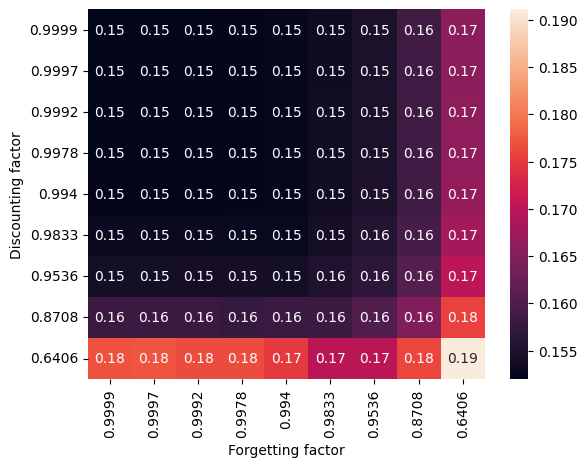

In [4]:
# sns heatmap
sns.heatmap(s1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [5]:
# table
display(Markdown(m_mis_s2))
data_table.DataTable(s2, include_index=True)


<center>

### Mismodelling Case with State 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1704,0.1703,0.1703,0.1704,0.1705,0.1728,0.1745,0.1777,0.1811
0.9997,0.1704,0.1703,0.1703,0.1704,0.1705,0.1728,0.1746,0.1777,0.1813
0.9992,0.1705,0.1704,0.1704,0.1705,0.1706,0.1728,0.1746,0.1777,0.1813
0.9978,0.1706,0.1705,0.1705,0.1706,0.1707,0.1729,0.1748,0.1780,0.1816
0.9940,0.1710,0.1709,0.1709,0.1709,0.1710,0.1734,0.1748,0.1784,0.1813
0.9833,0.1724,0.1723,0.1725,0.1726,0.1726,0.1748,0.1757,0.1787,0.1827
0.9536,0.1740,0.1739,0.1737,0.1739,0.1735,0.1758,0.1762,0.1797,0.1853
0.8708,0.1752,0.1752,0.1752,0.1757,0.1749,0.1751,0.1776,0.1821,0.1911
0.6406,0.1895,0.1890,0.1898,0.1892,0.1881,0.1834,0.1796,0.1868,0.1952


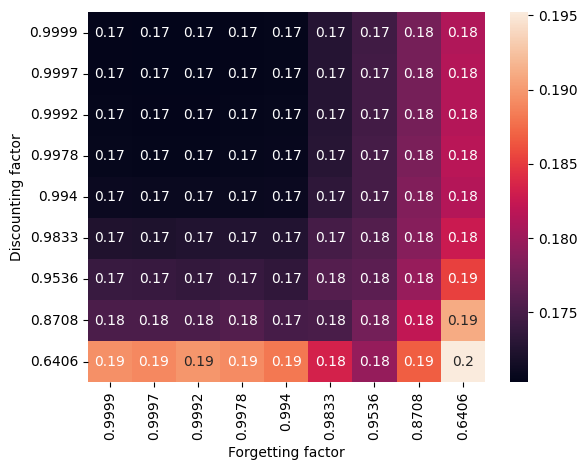

In [6]:
# sns heatmap
sns.heatmap(s2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [7]:
# table
display(Markdown(m_mis_s3))
data_table.DataTable(s3, include_index=True)


<center>

### Mismodelling Case with State 3

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.6775,0.6775,0.6775,0.6772,0.6769,0.6736,0.6706,0.6637,0.6531
0.9997,0.6775,0.6775,0.6775,0.6772,0.6769,0.6736,0.6705,0.6637,0.6530
0.9992,0.6774,0.6774,0.6774,0.6771,0.6768,0.6734,0.6705,0.6637,0.6527
0.9978,0.6773,0.6773,0.6773,0.6770,0.6767,0.6733,0.6703,0.6633,0.6522
0.9940,0.6767,0.6767,0.6767,0.6766,0.6763,0.6728,0.6701,0.6629,0.6521
0.9833,0.6745,0.6745,0.6744,0.6744,0.6744,0.6709,0.6685,0.6620,0.6494
0.9536,0.6718,0.6719,0.6720,0.6717,0.6723,0.6689,0.6672,0.6596,0.6446
0.8708,0.6668,0.6668,0.6668,0.6667,0.6671,0.6665,0.6622,0.6531,0.6331
0.6406,0.6336,0.6339,0.6337,0.6343,0.6369,0.6466,0.6503,0.6371,0.6136


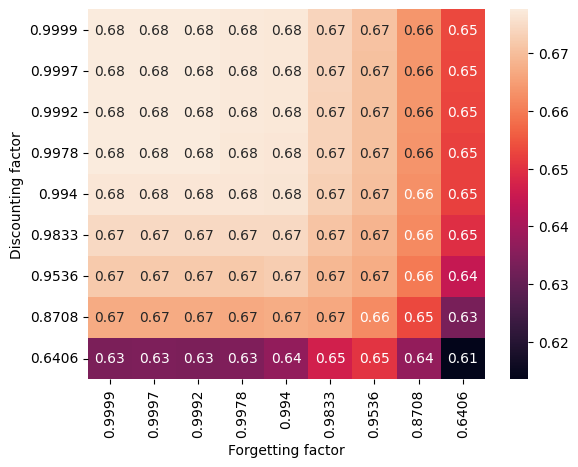

In [8]:
# sns heatmap
sns.heatmap(s3, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [9]:
# table
display(Markdown(m_mis_a1))
data_table.DataTable(a1, include_index=False)


<center>

### Mismodelling Case with Action 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.0672,0.0674,0.0674,0.0677,0.0689,0.0739,0.0803,0.0969,0.1225
0.9997,0.0672,0.0674,0.0674,0.0677,0.0689,0.0739,0.0803,0.0969,0.1224
0.9992,0.0672,0.0674,0.0674,0.0677,0.0689,0.0741,0.0804,0.0971,0.1231
0.9978,0.0675,0.0677,0.0677,0.0680,0.0692,0.0744,0.0808,0.0979,0.1240
0.9940,0.0685,0.0687,0.0687,0.0689,0.0701,0.0755,0.0820,0.0988,0.1251
0.9833,0.0722,0.0724,0.0725,0.0727,0.0730,0.0785,0.0850,0.1019,0.1307
0.9536,0.0778,0.0777,0.0777,0.0787,0.0792,0.0845,0.0918,0.1098,0.1443
0.8708,0.0958,0.0958,0.0958,0.0960,0.0966,0.0995,0.1106,0.1324,0.1767
0.6406,0.1843,0.1845,0.1849,0.1836,0.1767,0.1552,0.1603,0.1920,0.2499


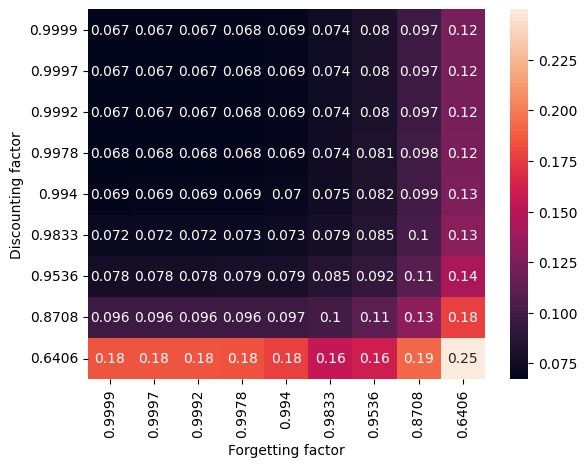

In [10]:
# sns heatmap
sns.heatmap(a1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [11]:
# table
display(Markdown(m_mis_a2))
data_table.DataTable(a2, include_index=True)


<center>

### Mismodelling Case with Action 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.9328,0.9326,0.9326,0.9323,0.9311,0.9261,0.9197,0.9031,0.8775
0.9997,0.9328,0.9326,0.9326,0.9323,0.9311,0.9261,0.9197,0.9031,0.8776
0.9992,0.9328,0.9326,0.9326,0.9323,0.9311,0.9259,0.9196,0.9029,0.8769
0.9978,0.9325,0.9323,0.9323,0.9320,0.9308,0.9256,0.9192,0.9021,0.8760
0.9940,0.9315,0.9313,0.9313,0.9311,0.9299,0.9245,0.9180,0.9012,0.8749
0.9833,0.9278,0.9276,0.9275,0.9273,0.9270,0.9215,0.9150,0.8981,0.8693
0.9536,0.9222,0.9223,0.9223,0.9213,0.9208,0.9155,0.9082,0.8902,0.8557
0.8708,0.9042,0.9042,0.9042,0.9040,0.9034,0.9005,0.8894,0.8676,0.8233
0.6406,0.8157,0.8155,0.8151,0.8164,0.8233,0.8448,0.8397,0.8080,0.7501


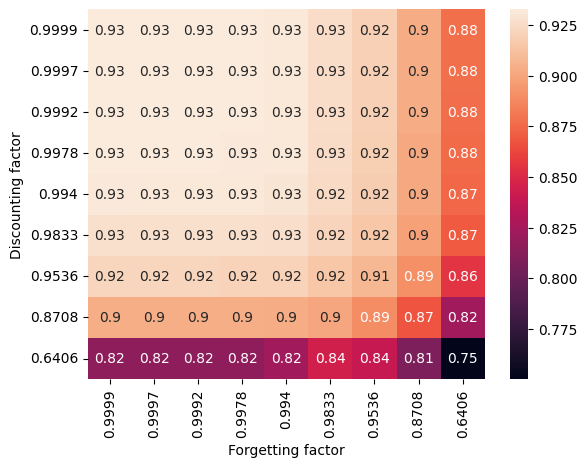

In [12]:
# sns heatmap
sns.heatmap(a2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

### System invariant in time

In [13]:
# state segmentation
s1 = s_notv.iloc[:9,]
s2 = s_notv.iloc[9:18,]
s3 = s_notv.iloc[18:,]

# action segmentation
a1 = a_notv.iloc[:9,]
a2 = a_notv.iloc[9:,]

# labels
s1.index = col_names
s2.index = col_names
s3.index = col_names

a1.index = col_names
a2.index = col_names

In [14]:
# table
display(Markdown(m_notv_s1))
data_table.DataTable(s1, include_index=True)


<center>

### Invariant Case with State 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1668,0.1668,0.1669,0.1670,0.1671,0.1676,0.1685,0.1716,0.1782
0.9997,0.1668,0.1668,0.1669,0.1670,0.1671,0.1676,0.1685,0.1716,0.1781
0.9992,0.1668,0.1668,0.1669,0.1670,0.1671,0.1676,0.1685,0.1716,0.1783
0.9978,0.1668,0.1668,0.1669,0.1670,0.1670,0.1676,0.1686,0.1717,0.1786
0.9940,0.1669,0.1669,0.1670,0.1670,0.1670,0.1679,0.1688,0.1720,0.1788
0.9833,0.1678,0.1678,0.1679,0.1680,0.1680,0.1688,0.1698,0.1728,0.1798
0.9536,0.1693,0.1693,0.1692,0.1699,0.1702,0.1707,0.1713,0.1748,0.1825
0.8708,0.1732,0.1732,0.1730,0.1734,0.1738,0.1748,0.1758,0.1797,0.1900
0.6406,0.1900,0.1916,0.1918,0.1900,0.1900,0.1846,0.1877,0.1898,0.2040


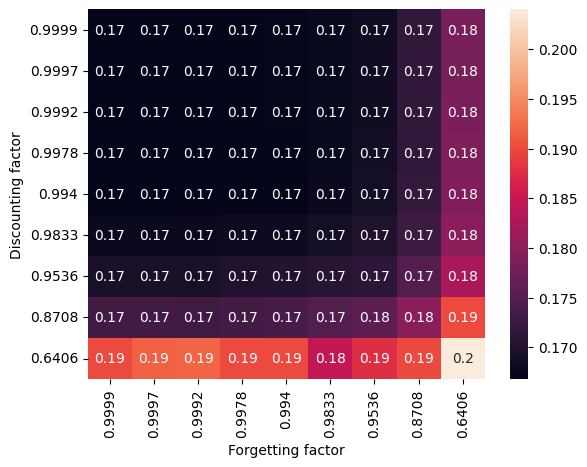

In [15]:
# sns heatmap
sns.heatmap(s1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [16]:
# table
display(Markdown(m_notv_s2))
data_table.DataTable(s2, include_index=True)


<center>

### Invariant Case with State 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1880,0.1881,0.1880,0.1880,0.1885,0.1895,0.1905,0.1934,0.1964
0.9997,0.1880,0.1881,0.1880,0.1880,0.1885,0.1895,0.1906,0.1934,0.1966
0.9992,0.1880,0.1881,0.1880,0.1880,0.1884,0.1896,0.1906,0.1933,0.1967
0.9978,0.1881,0.1881,0.1881,0.1881,0.1886,0.1897,0.1908,0.1936,0.1971
0.9940,0.1886,0.1886,0.1886,0.1887,0.1893,0.1900,0.1912,0.1946,0.1972
0.9833,0.1898,0.1900,0.1900,0.1900,0.1906,0.1910,0.1927,0.1959,0.1997
0.9536,0.1919,0.1919,0.1921,0.1917,0.1915,0.1918,0.1941,0.1956,0.2008
0.8708,0.1930,0.1930,0.1932,0.1925,0.1922,0.1932,0.1966,0.1979,0.2038
0.6406,0.2104,0.2138,0.2137,0.2103,0.2094,0.2024,0.2041,0.2033,0.2143


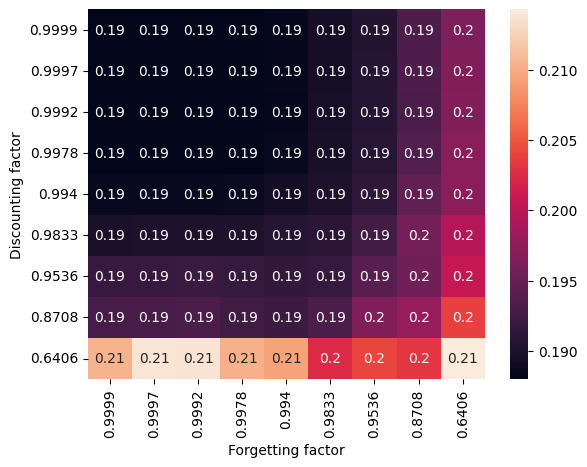

In [17]:
# sns heatmap
sns.heatmap(s2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [18]:
# table
display(Markdown(m_notv_s3))
data_table.DataTable(s3, include_index=True)


<center>

### Invariant Case with State 3

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.6453,0.6452,0.6452,0.6451,0.6445,0.6430,0.6410,0.6349,0.6254
0.9997,0.6453,0.6452,0.6452,0.6451,0.6445,0.6430,0.6409,0.6349,0.6253
0.9992,0.6453,0.6452,0.6452,0.6451,0.6446,0.6429,0.6409,0.6350,0.6250
0.9978,0.6452,0.6452,0.6451,0.6450,0.6445,0.6428,0.6406,0.6346,0.6243
0.9940,0.6446,0.6446,0.6445,0.6444,0.6438,0.6422,0.6400,0.6333,0.6240
0.9833,0.6425,0.6423,0.6422,0.6421,0.6414,0.6402,0.6375,0.6312,0.6205
0.9536,0.6388,0.6388,0.6387,0.6384,0.6382,0.6374,0.6345,0.6296,0.6167
0.8708,0.6337,0.6337,0.6337,0.6340,0.6339,0.6319,0.6276,0.6224,0.6062
0.6406,0.5995,0.5945,0.5944,0.5997,0.6007,0.6130,0.6083,0.6070,0.5817


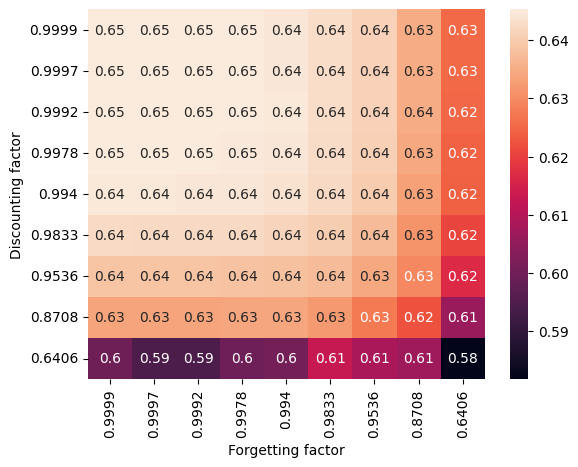

In [19]:
# sns heatmap
sns.heatmap(s3, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [20]:
# table
display(Markdown(m_notv_a1))
data_table.DataTable(a1, include_index=True)


<center>

### Invariant Case with Action 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.0748,0.0749,0.0751,0.0755,0.0767,0.0799,0.0859,0.1014,0.1259
0.9997,0.0748,0.0749,0.0751,0.0755,0.0767,0.0799,0.0859,0.1014,0.1258
0.9992,0.0748,0.0749,0.0751,0.0755,0.0766,0.0799,0.0859,0.1015,0.1266
0.9978,0.0752,0.0752,0.0755,0.0759,0.0769,0.0804,0.0867,0.1021,0.1278
0.9940,0.0765,0.0765,0.0768,0.0771,0.0781,0.0822,0.0880,0.1038,0.1295
0.9833,0.0812,0.0812,0.0815,0.0817,0.0830,0.0859,0.0926,0.1094,0.1350
0.9536,0.0914,0.0917,0.0917,0.0929,0.0938,0.0971,0.1051,0.1199,0.1501
0.8708,0.1128,0.1128,0.1122,0.1126,0.1145,0.1182,0.1280,0.1458,0.1853
0.6406,0.2093,0.2189,0.2185,0.2064,0.2038,0.1764,0.1939,0.2091,0.2662


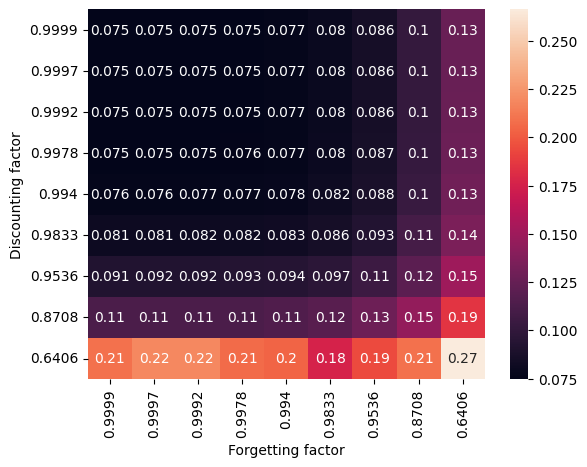

In [21]:
# sns heatmap
sns.heatmap(a1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [22]:
# table
display(Markdown(m_notv_a2))
data_table.DataTable(a2, include_index=True)


<center>

### Invariant Case with Action 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.9252,0.9251,0.9249,0.9245,0.9233,0.9201,0.9141,0.8986,0.8741
0.9997,0.9252,0.9251,0.9249,0.9245,0.9233,0.9201,0.9141,0.8986,0.8742
0.9992,0.9252,0.9251,0.9249,0.9245,0.9234,0.9201,0.9141,0.8985,0.8734
0.9978,0.9248,0.9248,0.9245,0.9241,0.9231,0.9196,0.9133,0.8979,0.8722
0.9940,0.9235,0.9235,0.9232,0.9229,0.9219,0.9178,0.9120,0.8962,0.8705
0.9833,0.9188,0.9188,0.9185,0.9183,0.9170,0.9141,0.9074,0.8906,0.8650
0.9536,0.9086,0.9083,0.9083,0.9071,0.9062,0.9029,0.8949,0.8801,0.8499
0.8708,0.8872,0.8872,0.8878,0.8874,0.8855,0.8818,0.8720,0.8542,0.8147
0.6406,0.7907,0.7811,0.7815,0.7936,0.7962,0.8236,0.8061,0.7909,0.7338


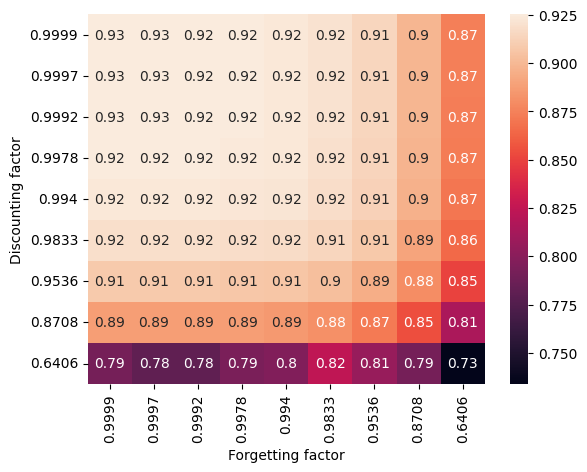

In [23]:
# sns heatmap
sns.heatmap(a2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

### Uncorrupted system

In [24]:
# state segmentation
s1 = s_nomis.iloc[:9,:]
s2 = s_nomis.iloc[9:18,:]
s3 = s_nomis.iloc[18:,:]

# action segmentation
a1 = a_nomis.iloc[:9,]
a2 = a_nomis.iloc[9:,]

# labels
s1.index = col_names
s2.index = col_names
s3.index = col_names

a1.index = col_names
a2.index = col_names

In [25]:
# table
display(Markdown(m_nomis_s1))
data_table.DataTable(s1, include_index=True)


<center>

### Correct Modelling Case with State 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1387,0.1387,0.1387,0.1387,0.1391,0.1399,0.1409,0.1448,0.1527
0.9997,0.1387,0.1387,0.1387,0.1387,0.1391,0.1399,0.1409,0.1448,0.1527
0.9992,0.1386,0.1386,0.1386,0.1386,0.1390,0.1398,0.1409,0.1448,0.1530
0.9978,0.1386,0.1386,0.1386,0.1386,0.1390,0.1398,0.1410,0.1449,0.1532
0.9940,0.1386,0.1386,0.1386,0.1386,0.1390,0.1397,0.1410,0.1449,0.1536
0.9833,0.1391,0.1391,0.1391,0.1391,0.1392,0.1403,0.1418,0.1455,0.1549
0.9536,0.1401,0.1401,0.1401,0.1404,0.1400,0.1405,0.1427,0.1472,0.1575
0.8708,0.1434,0.1434,0.1433,0.1435,0.1434,0.1437,0.1456,0.1508,0.1638
0.6406,0.1597,0.1595,0.1592,0.1579,0.1574,0.1537,0.1536,0.1625,0.1774


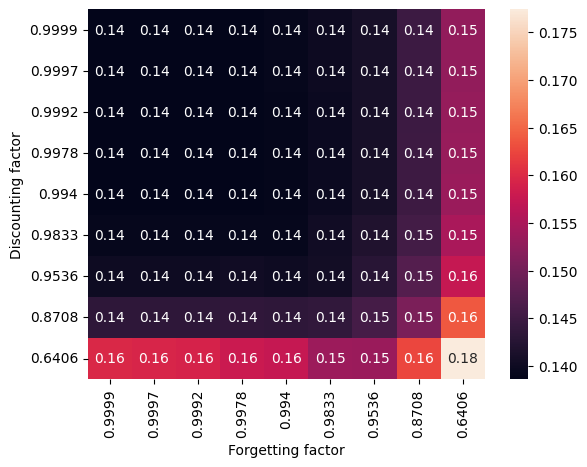

In [26]:
# sns heatmap
sns.heatmap(s1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [27]:
# table
display(Markdown(m_nomis_s2))
data_table.DataTable(s2, include_index=True)


<center>

### Correct Modelling Case with State 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.1550,0.1550,0.1550,0.1551,0.1552,0.1565,0.1584,0.1628,0.1674
0.9997,0.1550,0.1550,0.1550,0.1551,0.1552,0.1565,0.1584,0.1628,0.1674
0.9992,0.1551,0.1551,0.1551,0.1552,0.1553,0.1566,0.1584,0.1627,0.1675
0.9978,0.1552,0.1552,0.1552,0.1553,0.1554,0.1567,0.1587,0.1630,0.1676
0.9940,0.1553,0.1553,0.1553,0.1554,0.1556,0.1569,0.1588,0.1631,0.1677
0.9833,0.1569,0.1569,0.1570,0.1570,0.1571,0.1580,0.1600,0.1640,0.1688
0.9536,0.1578,0.1578,0.1578,0.1577,0.1580,0.1602,0.1613,0.1652,0.1707
0.8708,0.1593,0.1593,0.1595,0.1598,0.1603,0.1595,0.1637,0.1671,0.1755
0.6406,0.1731,0.1735,0.1732,0.1718,0.1691,0.1671,0.1666,0.1724,0.1802


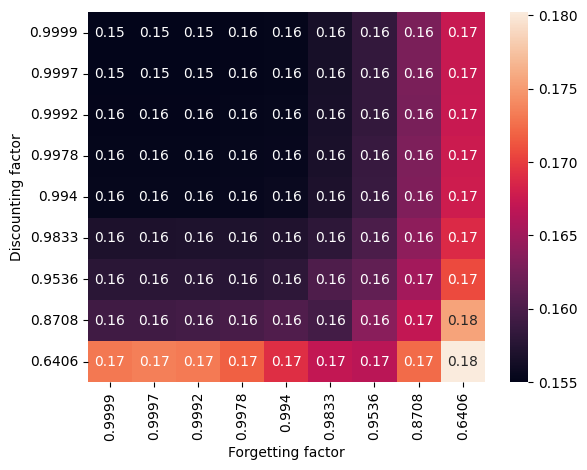

In [28]:
# sns heatmap
sns.heatmap(s2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [29]:
# table
display(Markdown(m_nomis_s3))
data_table.DataTable(s3, include_index=True)


<center>

### Correct Modelling Case with State 3

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.7063,0.7063,0.7063,0.7062,0.7057,0.7036,0.7007,0.6924,0.6799
0.9997,0.7063,0.7063,0.7063,0.7062,0.7057,0.7036,0.7007,0.6924,0.6799
0.9992,0.7063,0.7063,0.7063,0.7062,0.7057,0.7036,0.7007,0.6925,0.6795
0.9978,0.7062,0.7062,0.7062,0.7061,0.7056,0.7035,0.7003,0.6921,0.6792
0.9940,0.7061,0.7061,0.7061,0.7060,0.7054,0.7034,0.7002,0.6920,0.6787
0.9833,0.7040,0.7040,0.7039,0.7039,0.7037,0.7017,0.6982,0.6905,0.6763
0.9536,0.7021,0.7021,0.7021,0.7019,0.7020,0.6993,0.6960,0.6877,0.6717
0.8708,0.6973,0.6973,0.6972,0.6967,0.6963,0.6968,0.6907,0.6821,0.6607
0.6406,0.6672,0.6670,0.6676,0.6702,0.6735,0.6792,0.6798,0.6651,0.6424


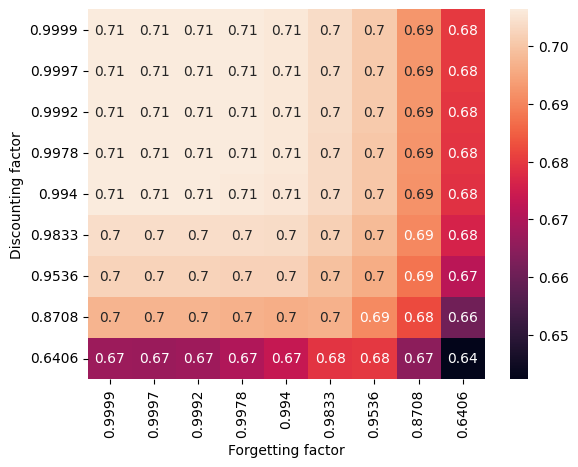

In [30]:
# sns heatmap
sns.heatmap(s3, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [31]:
# table
display(Markdown(m_nomis_a1))
data_table.DataTable(a1, include_index=True)


<center>

### Correct Modelling Case with Action 1

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.0649,0.0649,0.0651,0.0652,0.0663,0.0695,0.0758,0.0910,0.1177
0.9997,0.0649,0.0649,0.0651,0.0652,0.0663,0.0695,0.0758,0.0910,0.1177
0.9992,0.0649,0.0649,0.0651,0.0652,0.0663,0.0695,0.0759,0.0911,0.1184
0.9978,0.0651,0.0651,0.0653,0.0654,0.0665,0.0696,0.0763,0.0919,0.1191
0.9940,0.0658,0.0658,0.0660,0.0662,0.0672,0.0701,0.0769,0.0926,0.1205
0.9833,0.0679,0.0679,0.0682,0.0683,0.0688,0.0723,0.0796,0.0957,0.1252
0.9536,0.0735,0.0735,0.0735,0.0739,0.0743,0.0772,0.0854,0.1028,0.1381
0.8708,0.0864,0.0864,0.0866,0.0874,0.0879,0.0870,0.1022,0.1225,0.1686
0.6406,0.1596,0.1597,0.1593,0.1530,0.1477,0.1345,0.1411,0.1780,0.2347


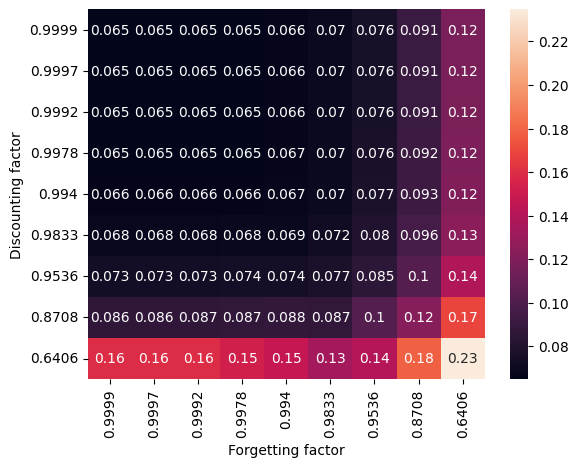

In [32]:
# sns heatmap
sns.heatmap(a1, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

In [33]:
# table
display(Markdown(m_nomis_a2))
data_table.DataTable(a2, include_index=True)


<center>

### Correct Modelling Case with Action 2

</center>


,0.9999,0.9997,0.9992,0.9978,0.9940,0.9833,0.9536,0.8708,0.6406
0.9999,0.9351,0.9351,0.9349,0.9348,0.9337,0.9305,0.9242,0.9090,0.8823
0.9997,0.9351,0.9351,0.9349,0.9348,0.9337,0.9305,0.9242,0.9090,0.8823
0.9992,0.9351,0.9351,0.9349,0.9348,0.9337,0.9305,0.9241,0.9089,0.8816
0.9978,0.9349,0.9349,0.9347,0.9346,0.9335,0.9304,0.9237,0.9081,0.8809
0.9940,0.9342,0.9342,0.9340,0.9338,0.9328,0.9299,0.9231,0.9074,0.8795
0.9833,0.9321,0.9321,0.9318,0.9317,0.9312,0.9277,0.9204,0.9043,0.8748
0.9536,0.9265,0.9265,0.9265,0.9261,0.9257,0.9228,0.9146,0.8972,0.8619
0.8708,0.9136,0.9136,0.9134,0.9126,0.9121,0.9130,0.8978,0.8775,0.8314
0.6406,0.8404,0.8403,0.8407,0.8470,0.8523,0.8655,0.8589,0.8220,0.7653


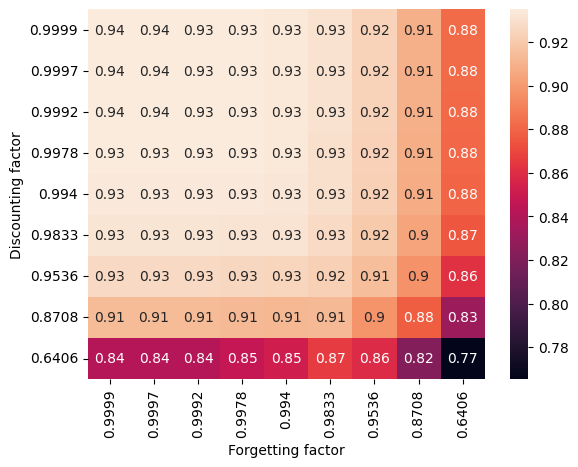

In [34]:
# sns heatmap
sns.heatmap(a2, annot = True)
plt.xlabel("Forgetting factor")
plt.ylabel("Discounting factor")
plt.show()

## Interactive Display

Choose a state as $s \in \{1,2,3\}$.

Choose an action as $a \in \{1,2\}$.

Choose a system model alternative as one of the following:


*   mismodelled,
*   invariant,
*   uncorrupted.

Outputs a .xlsx table and a heatmap for the chosen system.


In [37]:
#@title State distribution

# Create widgets for user input
state_input = widgets.Text(description='State:')
model_input = widgets.Text(description='Model:')
result_output = widgets.Output()

# Define a function to update the output based on user input
def get_state(button):
    with result_output:
        #result_output.clear_output()
        try:
            # Extract label
            state = state_input.value
            model = model_input.value

            # Find system
            if model == 'mismodelled':
                df = s_mis
                ms = [m_mis_s1, m_mis_s2, m_mis_s3]
            elif model == 'invariant':
                df = s_notv
                ms = [m_notv_s1, m_notv_s2, m_notv_s3]
            elif model == 'uncorrupted':
                df = s_nomis
                ms = [m_nomis_s1, m_nomis_s2, m_nomis_s3]
            else:
                raise ValueError(f"No '{model}' model found.")

            # Find corresponding dataframe
            if state == '1':
                df = df.iloc[:9,]
                df.index = col_names
                m = ms[0]
            elif state == '2':
                df = df.iloc[9:18,]
                df.index = col_names
                m = ms[1]
            elif state == '3':
                df = df.iloc[18:,]
                df.index = col_names
                m = ms[2]
            else:
                raise ValueError(f"State '{state}' not found.")

            # Retrieve the value based on the row and column labels
            display(Markdown(m))
            df.style.format(precision=4).to_excel('states.xlsx', engine='openpyxl')
            display(df)

            # sns heatmap
            sns.heatmap(df, annot = True)
            plt.xlabel("Forgetting factor")
            plt.ylabel("Discounting factor")
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

# Create a button to trigger the value retrieval
center_layout = widgets.Layout(margin='auto')
get_value_button = widgets.Button(description='Print results')
get_value_button.on_click(get_state)
get_value_button.layout = center_layout

# Apply layout to center state_input and model_input
centered_inputs_layout = widgets.Layout(margin='auto', width='40%')  # Adjust width as needed
state_input.layout = centered_inputs_layout
model_input.layout = centered_inputs_layout

# Apply layout to center result_output
centered_output_layout = widgets.Layout(margin='auto')
result_output.layout = centered_output_layout

# Create VBox with widgets and apply the custom layout
vbox = widgets.VBox([state_input, model_input, get_value_button, result_output])

# Display the VBox
display(vbox)

In [38]:
#@title Action distribution

# Create widgets for user input
action_input = widgets.Text(description='Action:')
model_input = widgets.Text(description='Model:')
result_output = widgets.Output()

# Define a function to update the output based on user input
def get_action(button):
    with result_output:
        #result_output.clear_output()
        try:
            # Extract label
            action = action_input.value
            model = model_input.value

            # Find system
            if model == 'mismodelled':
                df = a_mis
                ms = [m_mis_a1, m_mis_a2]
            elif model == 'invariant':
                df = a_notv
                ms = [m_notv_a1, m_notv_a2]
            elif model == 'uncorrupted':
                df = a_nomis
                ms = [m_nomis_a1, m_nomis_a2]
            else:
                raise ValueError(f"No '{model}' model found.")

            # Find corresponding dataframe
            if action == '1':
                df = df.iloc[:9,]
                df.index = col_names
                m = ms[0]
            elif action == '2':
                df = df.iloc[9:,]
                df.index = col_names
                m = ms[1]
            else:
                raise ValueError(f"Action '{action}' not found.")

            # Retrieve the value based on the row and column labels
            display(Markdown(m))
            df.style.format(precision=4).to_excel('actions.xlsx', engine='openpyxl')
            display(df)

            # sns heatmap
            sns.heatmap(df, annot = True)
            plt.xlabel("Forgetting factor")
            plt.ylabel("Discounting factor")
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

# Create a button to trigger the value retrieval
center_layout = widgets.Layout(margin='auto')
get_value_button = widgets.Button(description='Print results')
get_value_button.on_click(get_action)
get_value_button.layout = center_layout

# Apply layout to center state_input and model_input
centered_inputs_layout = widgets.Layout(margin='auto', width='40%')  # Adjust width as needed
action_input.layout = centered_inputs_layout
model_input.layout = centered_inputs_layout

# Apply layout to center result_output
centered_output_layout = widgets.Layout(margin='auto')
result_output.layout = centered_output_layout

# Create VBox with widgets and apply the custom layout
vbox = widgets.VBox([action_input, model_input, get_value_button, result_output])

# Display the VBox
display(vbox)